## Limpeza e Tratamento de Dados ##
### Atividade com intuito de realizar a prática de conceitos básicos de limpeza e tratamento de dados ###

**Condições que precisam ser atendidas:**
    
* Aparência: sol, chuva, nublado
* Temperatura: -130 ~ 130°F
* Umidade: 0 ~ 100
* Jogar: sim/não
* Tratar valores NAs

### 📚Importando Bibliotecas

In [1]:
import pandas as pd
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt

### 💾Carregando o conjunto de dados

In [2]:
df = pd.read_csv('../data/tempo.csv', sep = ';')

### 📊Explorando conjuto de dados

In [3]:
# Visualizando primeiros registros do dataframe
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes


In [5]:
# Somando e visualizando o total de dados Nulos por coluna
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [12]:
# Numérica (int64 ou float64) colunas
col_numericas = df.select_dtypes(include=['int64','float64'])

# Categórico (categorical ou object) colunas
col_categorica = df.select_dtypes(include=['object'])

print("Colunas numéricas:\n", col_numericas.columns.tolist())
print("Colunas categóricas:\n", col_categorica.columns.tolist())

Colunas numéricas:
 ['Temperatura', 'Umidade']
Colunas categóricas:
 ['Aparencia', 'Vento', 'Jogar']


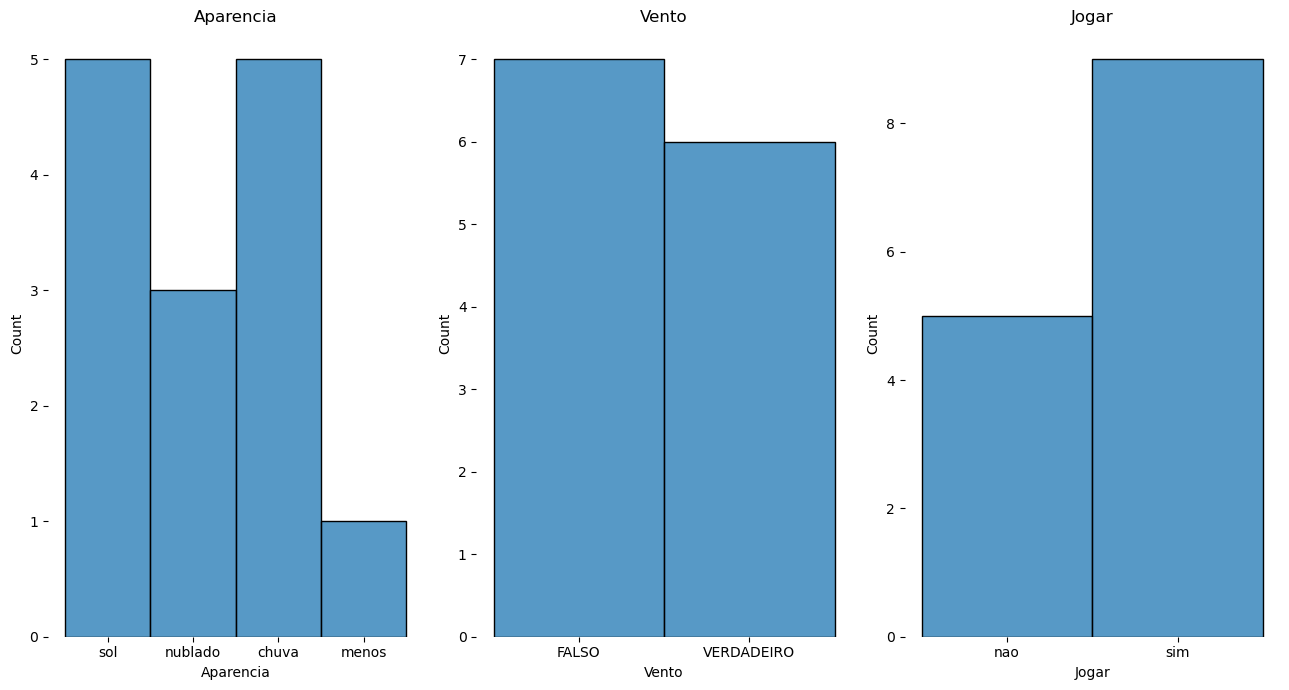

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(13, 7))

sns.histplot(data=df, x='Aparencia', y=None, ax=axs[0])
sns.histplot(data=df, x='Vento', y=None, ax=axs[1])
sns.histplot(data=df, x='Jogar', y=None,ax=axs[2])

axs[0].set_title('Aparencia')
axs[1].set_title('Vento')
axs[2].set_title('Jogar')

sns.despine(left=True,bottom=True)
plt.tight_layout() 

plt.show()

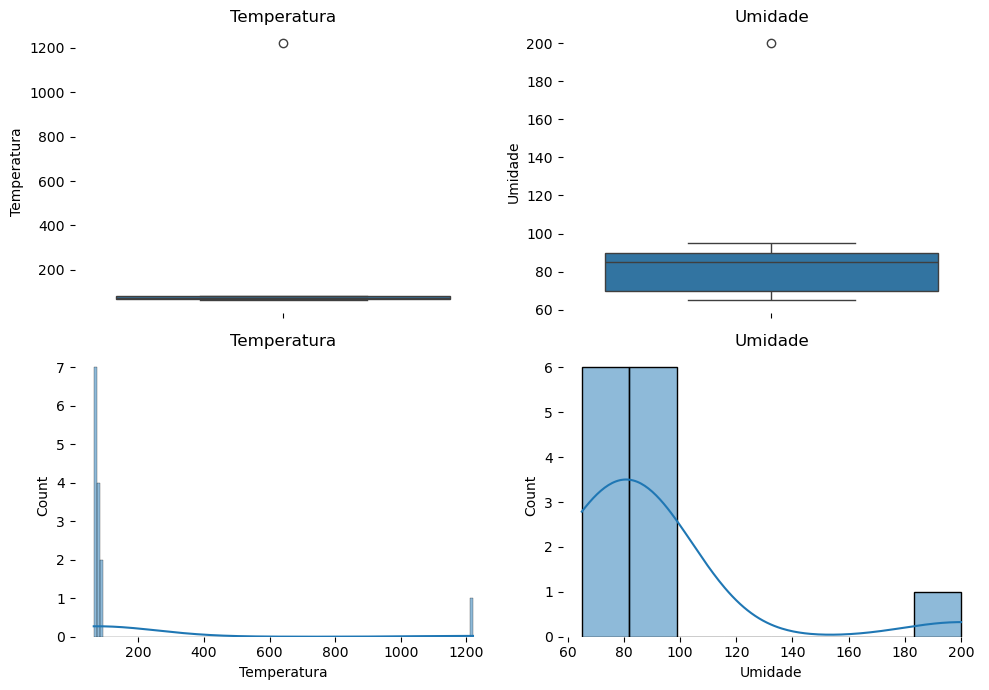

In [11]:
fig, (axs1, axs2) = plt.subplots(2, 2, figsize=(10, 7))

sns.boxplot(data=df, x=None, y="Temperatura", ax=axs1[0])
sns.boxplot(data=df, x=None, y="Umidade", ax=axs1[1])
sns.histplot(data=df, kde=True , x="Temperatura", y=None, ax=axs2[0])
sns.histplot(data=df, kde=True , x="Umidade", y=None, ax=axs2[1])


axs1[0].set_title('Temperatura')
axs1[1].set_title('Umidade')
axs2[0].set_title('Temperatura')
axs2[1].set_title('Umidade')

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

### 🔎 Análise Exploratória de Dados

In [13]:
# Visualizando métricas das colunas númericas
col_numericas.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


In [14]:
# Visalizando registro inválido em Aparencia
group = df.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [15]:
df.loc[df['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
# Visualizando Resultado
group = df.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [20]:
# Visualiando registro de temperatura fora do domínio
df.loc[(df['Temperatura'] < -130) |(df['Temperatura']> 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [21]:
# Calculando média da temperatura
median_temperatura = sts.median(df['Temperatura'])
median_temperatura

73.5

In [22]:
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130), 'Temperatura'] = median_temperatura

C:\Users\rodri\AppData\Local\Temp\ipykernel_17188\2572925135.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130), 'Temperatura'] = avg_temperatura


In [23]:
df.loc[(df['Temperatura'] <  -130 )  | ( df['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [24]:
group = df.groupby(['Umidade']).size()
group

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [25]:
df['Umidade'].isnull().sum()

1

In [28]:
median_umidade = sts.median(df['Umidade'])
median_umidade

85.5

In [30]:
df['Umidade'].fillna(median_umidade, inplace= True)

In [31]:
df['Temperatura'].isnull().sum()

0

In [32]:
# Visualizando valores fora do padrão
df.loc[(df['Umidade'] < 0) | (df['Umidade']>100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [33]:
# substituindo valor fora do padrao pela mediana
df.loc[(df['Umidade'] < 0)|(df['Umidade'] > 100), 'Umidade'] = median_umidade

In [34]:
df.loc[(df['Umidade'] < 0) | (df['Umidade'] >100 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [35]:
group = df.groupby(['Vento']).size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [36]:
df['Vento'].isnull().sum()

1

In [38]:
df['Vento'].fillna('FALSO', inplace=True)

In [39]:
df['Vento'].isnull().sum()

0

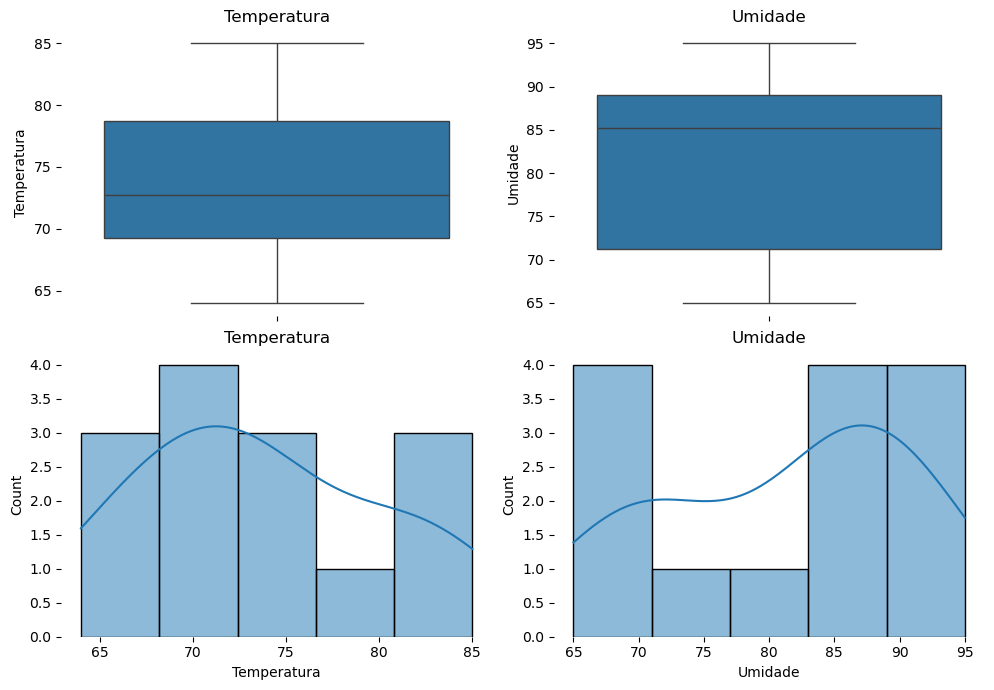

In [40]:
# Gerando gráficos apos o limpezas e tratamentos dos dados(Colunas numéricas)
fig, (axs1, axs2) = plt.subplots(2, 2, figsize=(10, 7))

sns.boxplot(data=df, x=None, y="Temperatura", ax=axs1[0])
sns.boxplot(data=df, x=None, y="Umidade", ax=axs1[1])
sns.histplot(data=df, kde=True , x="Temperatura", y=None, ax=axs2[0])
sns.histplot(data=df, kde=True , x="Umidade", y=None, ax=axs2[1])


axs1[0].set_title('Temperatura')
axs1[1].set_title('Umidade')
axs2[0].set_title('Temperatura')
axs2[1].set_title('Umidade')

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

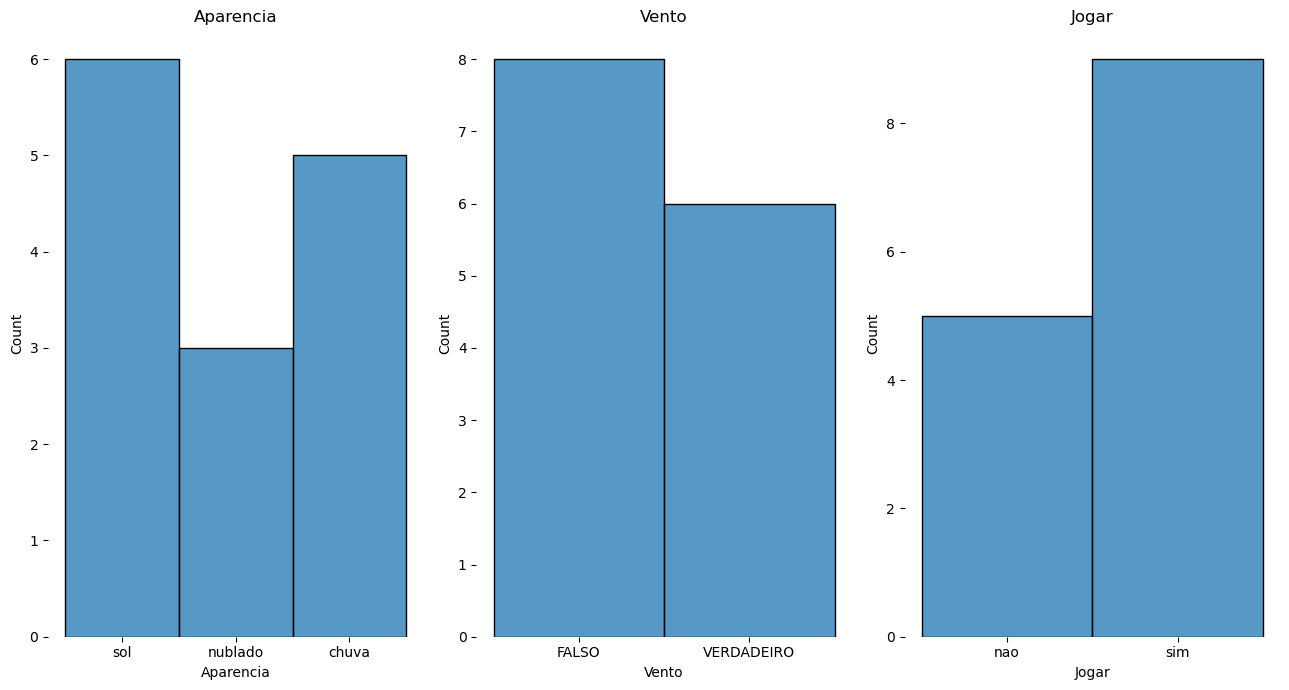

In [41]:
# Gerando gráficos apos o limpezas e tratamentos dos dados(Colunas categóricas)
fig, axs = plt.subplots(1, 3, figsize=(13, 7))

sns.histplot(data=df, x='Aparencia', y=None, ax=axs[0])
sns.histplot(data=df, x='Vento', y=None, ax=axs[1])
sns.histplot(data=df, x='Jogar', y=None,ax=axs[2])

axs[0].set_title('Aparencia')
axs[1].set_title('Vento')
axs[2].set_title('Jogar')

sns.despine(left=True,bottom=True)
plt.tight_layout() 

plt.show()